# Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data


Part 4: Working with geospatial data and mapping in Python

*Mark Bauer*

Table of Contents
=================

In progress.
       
       
   * [5. Conclusion](#-5.-Conclusion)

**Goal:** In this notebook, we will review various examples of plotting and data visualizations.

**Main Libraries:** 

[pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

[GeoPandas](https://geopandas.org/index.html) is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting.

[GeoPandas Description](https://geopandas.org/index.html#description):  
The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.

# 1. Importing Libraries

In [152]:
# importing libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import fiona
from fiona.crs import from_epsg
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import urllib
import json
from io import BytesIO
import requests
from sodapy import Socrata
import os
import zipfile
from zipfile import ZipFile
from os.path import basename
import contextily as ctx

Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

In [153]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [154]:
%watermark -v -p numpy,pandas,geopandas,matplotlib.pyplot,json,requests,sodapy

CPython 3.7.1
IPython 7.18.1

numpy 1.19.2
pandas 1.0.0
geopandas 0.8.1
matplotlib.pyplot 3.3.2
json 2.0.9
requests 2.24.0
sodapy 2.0.0


Documention for installing watermark: https://github.com/rasbt/watermark

In [155]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Reading and Writing Files

## Reading Spatial Data

In [156]:
# Reading in GeoJSON
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...

In [157]:
# Reading in shapefile inside a zip folder
zipfile = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(zipfile)

school_points.head()

ATS_CODE BORO  BORONUM LOC_CODE  \
0  b'15K001 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K001   
1  b'17K002 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K002   
2  b'21K095 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K095   
3  b'21K096 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K096   
4  b'21K097 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K097   

               SCHOOLNAME                         SCH_TYPE  MANAGED_BY  \
0     P.S. 001 THE BERGEN                       Elementary           1   
1                M.S. 002  Junior High-Intermediate-Middle           1   
2  P.S. 095 THE GRAVESEND                              K-8           1   
3       I.S. 096 SETH LOW  Junior High-Intermediate-Middle           1   
4    P.S. 97 THE HIGHLAWN                       Elementary           1   

   GEO_DISTRI  ADMIN_DIST                 ADDRESS STATE_CODE    ZIP  \
0          15          15           309 47 STREET         NY  11220   
1          17          17     655 PARKSIDE AVENUE         NY  11226   
2          21          21  345 VAN SICKLEN STREET         NY  11223   
3          21          21             99 AVENUE P         NY  11204   
4          21          21   1855 STILLWELL AVENUE         NY  11223   

                PRINCIPAL       PRIN_PH           FAX  \
0        Jennifer Eusanio  718-567-7661  718-567-9771   
1        ADRIENNE SPENCER  718-462-6992  718-284-7717   
2           Janet Ndzibah  718-449-5050  718-449-3047   
3  Denise Sandra Levinsky  718-236-1344  718-236-2397   
4       KRISTINE MUSTILLO  718-372-7393  718-372-3842   

                             GRADES      City                       geometry  
0           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (980985.054 175780.759)  
1                       06,07,08,SE  BROOKLYN  POINT (997785.136 178431.911)  
2  PK,0K,01,02,03,04,05,06,07,08,SE  BROOKLYN  POINT (991224.983 156323.361)  
3                       06,07,08,SE  BROOKLYN  POINT (988439.681 160709.993)  
4           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (988205.073 158329.591)

In [158]:
ls data/

nta_shape.cpg      nta_shape.geojson  nta_shape.shp
nta_shape.dbf      nta_shape.prj      nta_shape.shx


## Writing Spatial Data

In [159]:
# Writing to Shapefile:
nta_shape.to_file("data/nta_shape.shp")

# Writing to GeoJSON:
nta_shape.to_file("data/nta_shape.geojson", driver='GeoJSON')

In [160]:
ls data/

nta_shape.cpg      nta_shape.geojson  nta_shape.shp
nta_shape.dbf      nta_shape.prj      nta_shape.shx


# Data Structures

In [161]:
nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...

## GeoSeries

In [162]:
type(nta_shape['geometry'])

geopandas.geoseries.GeoSeries

## GeoDataFrame

In [163]:
type(nta_shape)

geopandas.geodataframe.GeoDataFrame

# Attributes and Methods

## Basic Attributes

In [164]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...

In [165]:
nta_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [166]:
nta_shape.to_crs(epsg=2263, inplace=True)

nta_shape.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [167]:
nta_shape.geometry.name

'geometry'

In [168]:
nta_shape.area

0      54005019.048
1      52488277.591
2      19726946.569
3      14522603.592
4      22887772.809
           ...     
190   225338344.201
191    50978402.862
192    47308036.617
193   100210684.532
194   309063340.069
Length: 195, dtype: float64

In [169]:
nta_shape.length

0      39247.228
1      33266.905
2      19816.685
3      18756.702
4      20976.336
         ...    
190   385525.873
191    33792.263
192    43696.365
193   119014.571
194   487054.164
Length: 195, dtype: float64

In [170]:
nta_shape.bounds

minx       miny        maxx       maxy
0    982208.206 162478.112  991773.079 174107.999
1   1032285.263 215407.440 1042341.099 223347.719
2   1018489.773 214963.455 1024560.201 220477.853
3    995708.028 171874.264  999315.731 178131.302
4   1047476.922 195242.429 1053433.777 201532.097
..          ...        ...         ...        ...
190  977420.822 149419.880 1030453.459 197615.718
191 1025988.075 187476.975 1036764.145 195882.129
192 1035162.882 191039.730 1048446.277 200102.186
193 1000721.907 136686.831 1035685.834 163473.152
194 1004114.386 142011.783 1058145.096 224422.048

[195 rows x 4 columns]

In [171]:
nta_shape.total_bounds

array([ 913175.10900879,  120121.88126113, 1067382.50860596,
        272844.29400627])

In [172]:
nta_shape.geom_type

0      MultiPolygon
1      MultiPolygon
2      MultiPolygon
3      MultiPolygon
4      MultiPolygon
           ...     
190    MultiPolygon
191    MultiPolygon
192    MultiPolygon
193    MultiPolygon
194    MultiPolygon
Length: 195, dtype: object

In [173]:
nta_shape.geom_type.value_counts()

MultiPolygon    195
dtype: int64

In [174]:
nta_shape.is_valid

0      True
1      True
2      True
3      True
4      True
       ... 
190    True
191    True
192    True
193    True
194    True
Length: 195, dtype: bool

In [175]:
nta_shape.is_valid.value_counts()

True    195
dtype: int64

In [176]:
zipfile = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(zipfile)

school_points.head()

ATS_CODE BORO  BORONUM LOC_CODE  \
0  b'15K001 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K001   
1  b'17K002 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K002   
2  b'21K095 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K095   
3  b'21K096 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K096   
4  b'21K097 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K097   

               SCHOOLNAME                         SCH_TYPE  MANAGED_BY  \
0     P.S. 001 THE BERGEN                       Elementary           1   
1                M.S. 002  Junior High-Intermediate-Middle           1   
2  P.S. 095 THE GRAVESEND                              K-8           1   
3       I.S. 096 SETH LOW  Junior High-Intermediate-Middle           1   
4    P.S. 97 THE HIGHLAWN                       Elementary           1   

   GEO_DISTRI  ADMIN_DIST                 ADDRESS STATE_CODE    ZIP  \
0          15          15           309 47 STREET         NY  11220   
1          17          17     655 PARKSIDE AVENUE         NY  11226   
2          21          21  345 VAN SICKLEN STREET         NY  11223   
3          21          21             99 AVENUE P         NY  11204   
4          21          21   1855 STILLWELL AVENUE         NY  11223   

                PRINCIPAL       PRIN_PH           FAX  \
0        Jennifer Eusanio  718-567-7661  718-567-9771   
1        ADRIENNE SPENCER  718-462-6992  718-284-7717   
2           Janet Ndzibah  718-449-5050  718-449-3047   
3  Denise Sandra Levinsky  718-236-1344  718-236-2397   
4       KRISTINE MUSTILLO  718-372-7393  718-372-3842   

                             GRADES      City                       geometry  
0           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (980985.054 175780.759)  
1                       06,07,08,SE  BROOKLYN  POINT (997785.136 178431.911)  
2  PK,0K,01,02,03,04,05,06,07,08,SE  BROOKLYN  POINT (991224.983 156323.361)  
3                       06,07,08,SE  BROOKLYN  POINT (988439.681 160709.993)  
4           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (988205.073 158329.591)

In [177]:
school_points['geometry'].x

0       980985.054
1       997785.136
2       991224.983
3       988439.681
4       988205.073
           ...    
1704   1000974.837
1705   1027676.631
1706   1008199.775
1707   1008239.820
1708   1006497.117
Length: 1709, dtype: float64

In [178]:
school_points['geometry'].y

0      175780.759
1      178431.911
2      156323.361
3      160709.993
4      158329.591
          ...    
1704   216289.829
1705   251468.398
1706   259137.237
1707   259105.897
1708   235553.859
Length: 1709, dtype: float64

### Unary Predicates

In [179]:
nta_shape.geometry.is_empty.value_counts()

False    195
dtype: int64

In [180]:
nta_shape.geometry.isna().value_counts()

False    195
Name: geometry, dtype: int64

In [181]:
nta_shape['geometry'].is_simple.value_counts()

True    195
dtype: int64

## Basic Methods

In [182]:
nta_shape.centroid

0       POINT (987397.463 169148.408)
1      POINT (1037005.224 219265.318)
2      POINT (1020706.745 217413.871)
3       POINT (997674.726 174677.650)
4      POINT (1050471.492 198271.804)
                    ...              
190    POINT (1006576.015 166297.653)
191    POINT (1031134.609 192361.611)
192    POINT (1041371.284 195964.278)
193    POINT (1018636.191 147566.096)
194    POINT (1030807.168 190601.758)
Length: 195, dtype: geometry

In [183]:
nta_shape.distance(nta_shape.centroid)

0        0.000
1        0.000
2        0.000
3        0.000
4        0.000
        ...   
190   5659.268
191      0.000
192      0.000
193   2256.884
194   4906.539
Length: 195, dtype: float64

In [184]:
distance = nta_shape.distance(nta_shape.centroid)

distance.value_counts()

0.000       186
1428.477      1
211.828       1
368.429       1
2256.884      1
4906.539      1
5659.268      1
224.812       1
310.705       1
6158.447      1
dtype: int64

In [185]:
nta_shape.representative_point()

0       POINT (987147.799 168296.940)
1      POINT (1037188.868 219481.436)
2      POINT (1020704.334 217630.915)
3       POINT (997512.057 175092.435)
4      POINT (1050352.622 198427.878)
                    ...              
190    POINT (1013094.270 155382.640)
191    POINT (1031657.891 191801.466)
192    POINT (1039609.012 195562.861)
193    POINT (1005567.231 141616.367)
194    POINT (1018631.541 192785.274)
Length: 195, dtype: geometry

In [186]:
distance = nta_shape.distance(nta_shape.representative_point())

distance.value_counts()

0.000    195
dtype: int64

In [187]:
print("CRS: " + str(nta_shape.crs))
print("CRS: " + str(nta_shape.to_crs(epsg=4326).crs))

CRS: epsg:2263
CRS: epsg:4326


<AxesSubplot:>

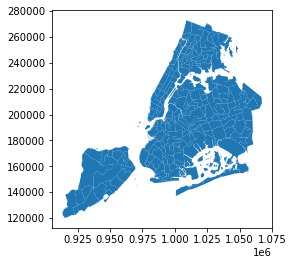

In [188]:
nta_shape.plot()

<AxesSubplot:>

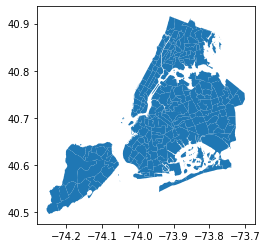

In [189]:
nta_shape.to_crs(epsg=4326).plot()

### Create Centroids from Polygons

In [190]:
nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  
0         3  MULTIPOLYGON (((990897.900 169268.121, 990588....  
1         4  MULTIPOLYGON (((1038593.459 221913.355, 103936...  
2         4  MULTIPOLYGON (((1022728.275 217530.808, 102305...  
3         3  MULTIPOLYGON (((998608.334 171942.436, 998339....  
4         4  MULTIPOLYGON (((1051539.660 201007.013, 105192...

<AxesSubplot:>

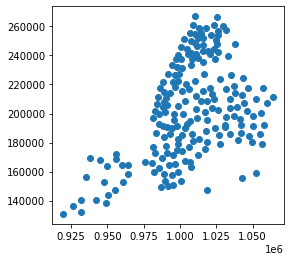

In [191]:
nta_shape['centroid_column'] = nta_shape.centroid

nta_shape.set_geometry('centroid_column').plot()

### Relationship Tests

In [192]:
nta_shape['geometry'].contains(nta_shape['centroid_column']).value_counts()

True     186
False      9
dtype: int64

In [193]:
nta_shape['centroid_column'].within(nta_shape['geometry']).value_counts()

True     186
False      9
dtype: int64

In [194]:
nta_shape.representative_point().within(nta_shape['geometry']).value_counts()

True    195
dtype: int64

In [195]:
nta_shape['centroid_column'].intersects(nta_shape['geometry']).value_counts()

True     186
False      9
dtype: int64

In [196]:
nta_shape['within'] = nta_shape.centroid_column.within(nta_shape['geometry'])

print(nta_shape[nta_shape['within'] == False].shape)
nta_shape[nta_shape['within'] == False].head()

(9, 10)


ntacode     shape_area county_fips  \
11     BX10  40134533.2335         005   
92     BX03  40256794.2545         005   
110    MN99  91543352.7608         061   
125    SI22  56030445.2217         085   
138    BX99  220837194.772         005   

                                       ntaname     shape_leng      boro_name  \
11         Pelham Bay-Country Club-City Island  138249.436712          Bronx   
92             Eastchester-Edenwald-Baychester  59164.9993069          Bronx   
110                park-cemetery-etc-Manhattan  155354.846333      Manhattan   
125  West New Brighton-New Brighton-St. George   66054.251684  Staten Island   
138                    park-cemetery-etc-Bronx  223421.140891          Bronx   

    boro_code                                           geometry  \
11          2  MULTIPOLYGON (((1042822.450 243439.814, 104255...   
92          2  MULTIPOLYGON (((1033004.041 263542.959, 103327...   
110         1  MULTIPOLYGON (((981219.056 188655.316, 980940....   
125         5  MULTIPOLYGON (((964105.855 171704.149, 963907....   
138         2  MULTIPOLYGON (((1020356.163 236653.068, 102035...   

                    centroid_column  within  
11   POINT (1037775.120 247764.710)   False  
92   POINT (1029422.433 260268.325)   False  
110   POINT (996760.243 226350.078)   False  
125   POINT (955854.706 172087.534)   False  
138  POINT (1026256.366 257174.837)   False

In [197]:
nta_shape[nta_shape['within'] == False]['ntaname'].value_counts()

Stapleton-Rosebank                                       1
park-cemetery-etc-Brooklyn                               1
park-cemetery-etc-Manhattan                              1
park-cemetery-etc-Queens                                 1
park-cemetery-etc-Bronx                                  1
West New Brighton-New Brighton-St. George                1
Eastchester-Edenwald-Baychester                          1
Pelham Bay-Country Club-City Island                      1
Breezy Point-Belle Harbor-Rockaway Park-Broad Channel    1
Name: ntaname, dtype: int64

In [198]:
multi_shapes = nta_shape[nta_shape['within'] == False]

multi_shapes[['ntaname', 'geometry']]

ntaname  \
11                 Pelham Bay-Country Club-City Island   
92                     Eastchester-Edenwald-Baychester   
110                        park-cemetery-etc-Manhattan   
125          West New Brighton-New Brighton-St. George   
138                            park-cemetery-etc-Bronx   
176                                 Stapleton-Rosebank   
190                         park-cemetery-etc-Brooklyn   
193  Breezy Point-Belle Harbor-Rockaway Park-Broad ...   
194                           park-cemetery-etc-Queens   

                                              geometry  
11   MULTIPOLYGON (((1042822.450 243439.814, 104255...  
92   MULTIPOLYGON (((1033004.041 263542.959, 103327...  
110  MULTIPOLYGON (((981219.056 188655.316, 980940....  
125  MULTIPOLYGON (((964105.855 171704.149, 963907....  
138  MULTIPOLYGON (((1020356.163 236653.068, 102035...  
176  MULTIPOLYGON (((964105.855 171704.149, 964108....  
190  MULTIPOLYGON (((1007822.043 152881.588, 100783...  
193  MULTIPOLYGON (((1016626.562 146409.869, 101665...  
194  MULTIPOLYGON (((1021692.969 147138.664, 102188...

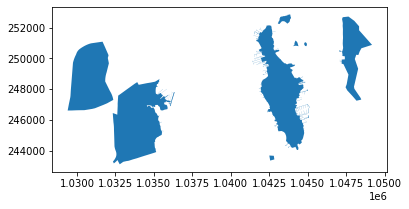

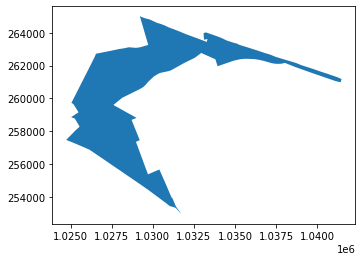

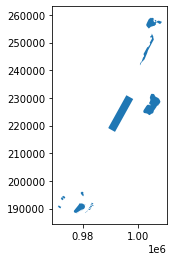

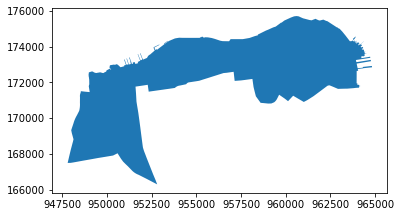

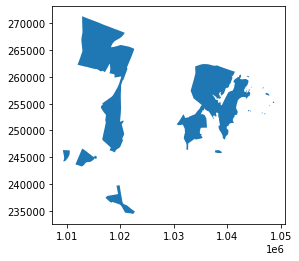

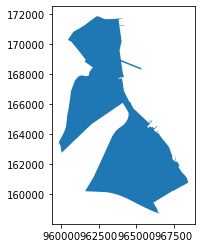

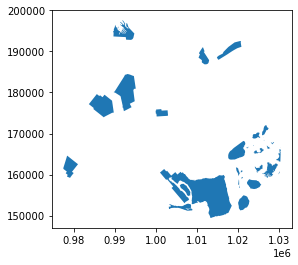

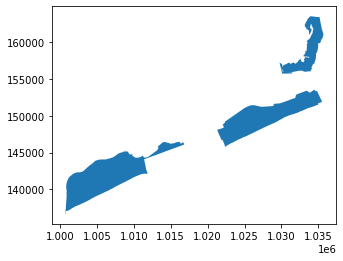

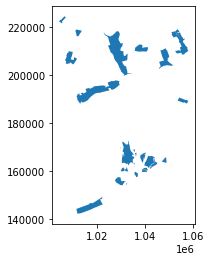

In [199]:
for i in range(len(multi_shapes)):
    multi_shapes.iloc[[i]].plot()

### Additional Attributes and Methods

#### Binary Predicates

In [200]:
nta_shape.centroid.geom_almost_equals(nta_shape.centroid).value_counts()

True    195
dtype: int64

In [201]:
nta_shape.centroid.geom_almost_equals(nta_shape.representative_point()).value_counts()

False    195
dtype: int64

<AxesSubplot:>

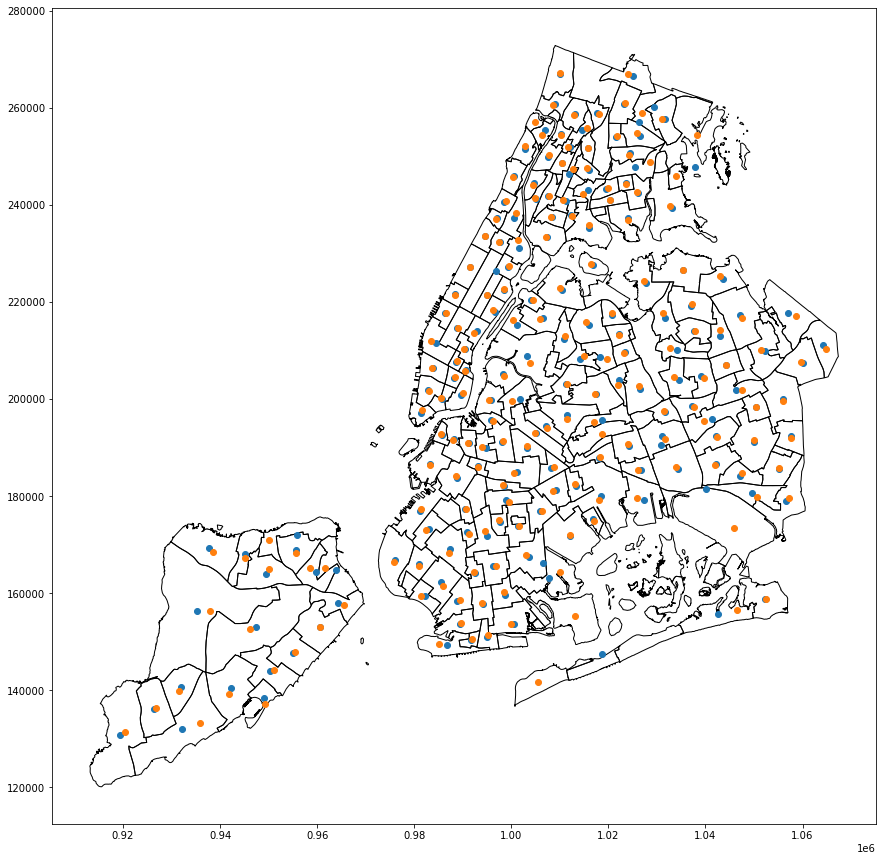

In [202]:
fig, ax = plt.subplots(figsize=(20,15)) # creating a figure

nta_shape.plot(ax=ax, color='none', edgecolor='black')
nta_shape.centroid.plot(ax=ax)
nta_shape.representative_point().plot(ax=ax)

In [203]:
nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  \
0         3  MULTIPOLYGON (((990897.900 169268.121, 990588....   
1         4  MULTIPOLYGON (((1038593.459 221913.355, 103936...   
2         4  MULTIPOLYGON (((1022728.275 217530.808, 102305...   
3         3  MULTIPOLYGON (((998608.334 171942.436, 998339....   
4         4  MULTIPOLYGON (((1051539.660 201007.013, 105192...   

                  centroid_column  within  
0   POINT (987397.463 169148.408)    True  
1  POINT (1037005.224 219265.318)    True  
2  POINT (1020706.745 217413.871)    True  
3   POINT (997674.726 174677.650)    True  
4  POINT (1050471.492 198271.804)    True

In [204]:
nta_shape['offset'] = nta_shape.geometry.translate(10000, 10000)

In [205]:
nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  \
0         3  MULTIPOLYGON (((990897.900 169268.121, 990588....   
1         4  MULTIPOLYGON (((1038593.459 221913.355, 103936...   
2         4  MULTIPOLYGON (((1022728.275 217530.808, 102305...   
3         3  MULTIPOLYGON (((998608.334 171942.436, 998339....   
4         4  MULTIPOLYGON (((1051539.660 201007.013, 105192...   

                  centroid_column  within  \
0   POINT (987397.463 169148.408)    True   
1  POINT (1037005.224 219265.318)    True   
2  POINT (1020706.745 217413.871)    True   
3   POINT (997674.726 174677.650)    True   
4  POINT (1050471.492 198271.804)    True   

                                              offset  
0  MULTIPOLYGON (((1000897.900 179268.121, 100058...  
1  MULTIPOLYGON (((1048593.459 231913.355, 104936...  
2  MULTIPOLYGON (((1032728.275 227530.808, 103305...  
3  MULTIPOLYGON (((1008608.334 181942.436, 100833...  
4  MULTIPOLYGON (((1061539.660 211007.013, 106192...

<AxesSubplot:>

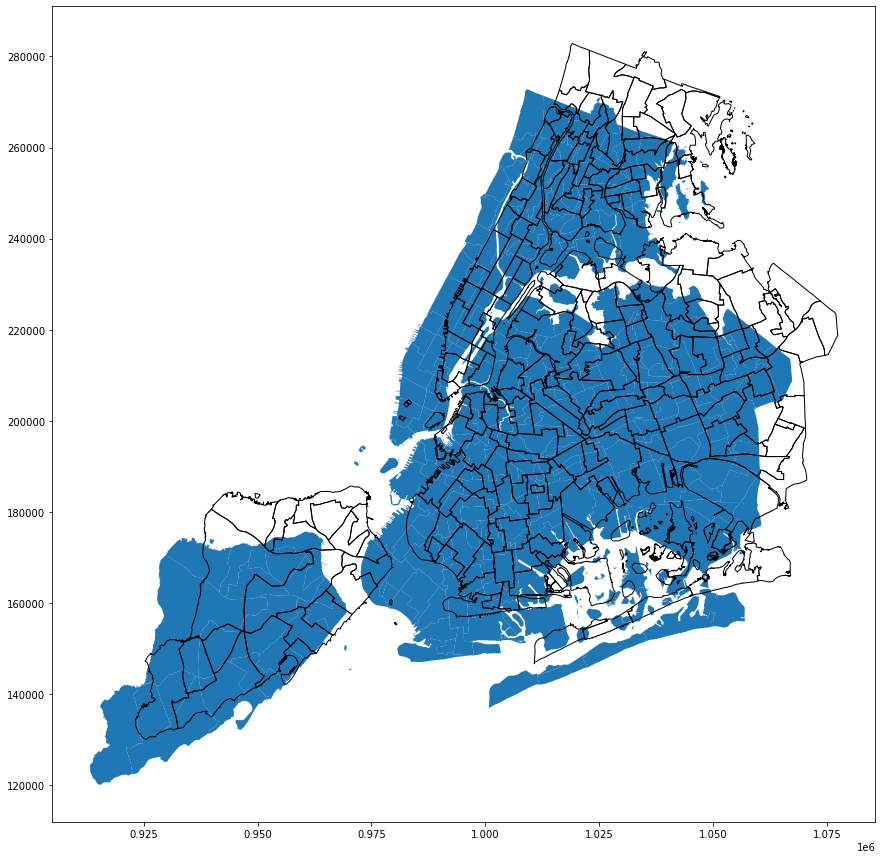

In [206]:
fig, ax = plt.subplots(figsize=(20,15)) # creating a figure

nta_shape.plot(ax=ax)

nta_shape.set_geometry('offset').plot(ax=ax,
                                     color='none',
                                     edgecolor='black')

In [207]:
nta_shape['geometry'].crosses(nta_shape.set_geometry('offset')).value_counts()

False    195
dtype: int64

In [208]:
nta_shape['geometry'].disjoint(nta_shape.set_geometry('offset')).value_counts()

True     185
False     10
dtype: int64

In [209]:
nta_shape['geometry'].overlaps(nta_shape.set_geometry('offset')).value_counts()

False    185
True      10
dtype: int64

In [210]:
nta_shape['geometry'].touches(nta_shape.set_geometry('offset')).value_counts()

False    195
dtype: int64

In [211]:
nta_shape['geometry'].covers(nta_shape.centroid).value_counts()

/Users/geribauer/anaconda3/lib/python3.7/site-packages/geopandas/base.py:61: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return GeoSeries(geoms.data, index=index, crs=this.crs)


True     186
False      9
dtype: int64

#### Set-Theoretic Methods

In [212]:
nta_shape.centroid_column.difference(nta_shape['geometry'])

0                         POINT EMPTY
1                         POINT EMPTY
2                         POINT EMPTY
3                         POINT EMPTY
4                         POINT EMPTY
                    ...              
190    POINT (1006576.015 166297.653)
191                       POINT EMPTY
192                       POINT EMPTY
193    POINT (1018636.191 147566.096)
194    POINT (1030807.168 190601.758)
Length: 195, dtype: geometry

In [213]:
nta_shape.centroid_column.intersection(nta_shape['geometry'])

0       POINT (987397.463 169148.408)
1      POINT (1037005.224 219265.318)
2      POINT (1020706.745 217413.871)
3       POINT (997674.726 174677.650)
4      POINT (1050471.492 198271.804)
                    ...              
190                       POINT EMPTY
191    POINT (1031134.609 192361.611)
192    POINT (1041371.284 195964.278)
193                       POINT EMPTY
194                       POINT EMPTY
Length: 195, dtype: geometry

In [214]:
nta_shape.centroid.symmetric_difference(nta_shape['geometry'])

0      POLYGON ((990897.900 169268.121, 990588.252 16...
1      POLYGON ((1038593.459 221913.355, 1039369.281 ...
2      POLYGON ((1022728.275 217530.808, 1023052.645 ...
3      POLYGON ((998608.334 171942.436, 998339.702 17...
4      POLYGON ((1051539.660 201007.013, 1051920.726 ...
                             ...                        
190    GEOMETRYCOLLECTION (POINT (1006576.015 166297....
191    POLYGON ((1035162.882 195252.025, 1035229.739 ...
192    POLYGON ((1048446.277 197901.245, 1048241.242 ...
193    GEOMETRYCOLLECTION (POINT (1018636.191 147566....
194    GEOMETRYCOLLECTION (POINT (1030807.168 190601....
Length: 195, dtype: geometry

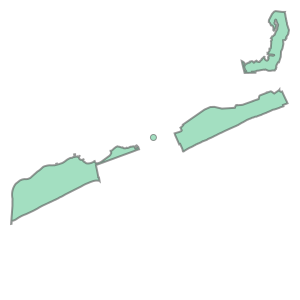

In [215]:
nta_shape.centroid.symmetric_difference(nta_shape['geometry']).iloc[193]

In [216]:
nta_shape.centroid.union(nta_shape['geometry'])

0      POLYGON ((990897.900 169268.121, 990588.252 16...
1      POLYGON ((1038593.459 221913.355, 1039369.281 ...
2      POLYGON ((1022728.275 217530.808, 1023052.645 ...
3      POLYGON ((998608.334 171942.436, 998339.702 17...
4      POLYGON ((1051539.660 201007.013, 1051920.726 ...
                             ...                        
190    GEOMETRYCOLLECTION (POINT (1006576.015 166297....
191    POLYGON ((1035162.882 195252.025, 1035229.739 ...
192    POLYGON ((1048446.277 197901.245, 1048241.242 ...
193    GEOMETRYCOLLECTION (POINT (1018636.191 147566....
194    GEOMETRYCOLLECTION (POINT (1030807.168 190601....
Length: 195, dtype: geometry

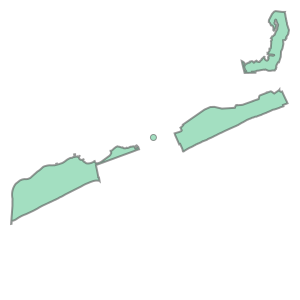

In [217]:
nta_shape.centroid.union(nta_shape['geometry']).iloc[193]

#### Constructive Methods

<AxesSubplot:>

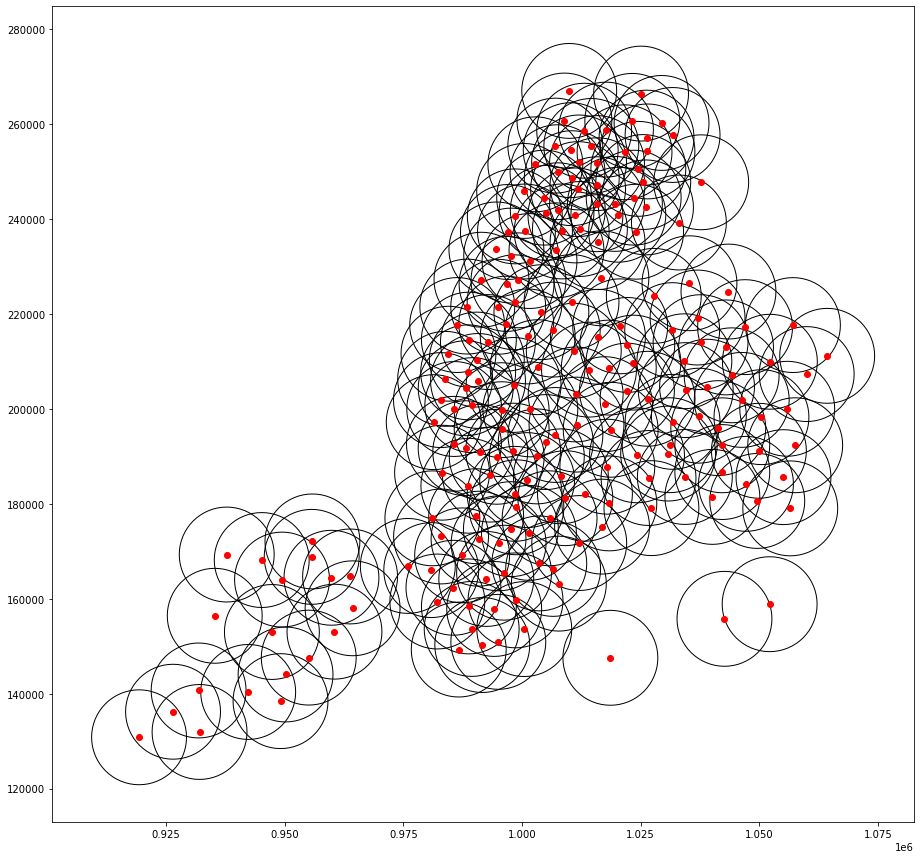

In [218]:
fig, ax = plt.subplots(figsize=(20,15)) # creating a figure

nta_shape.centroid.buffer(10000).plot(ax=ax, 
                                      color='none', 
                                      edgecolor='black')

nta_shape.centroid.plot(ax=ax, 
                        color='red', 
                        edgecolor='red')

<AxesSubplot:>

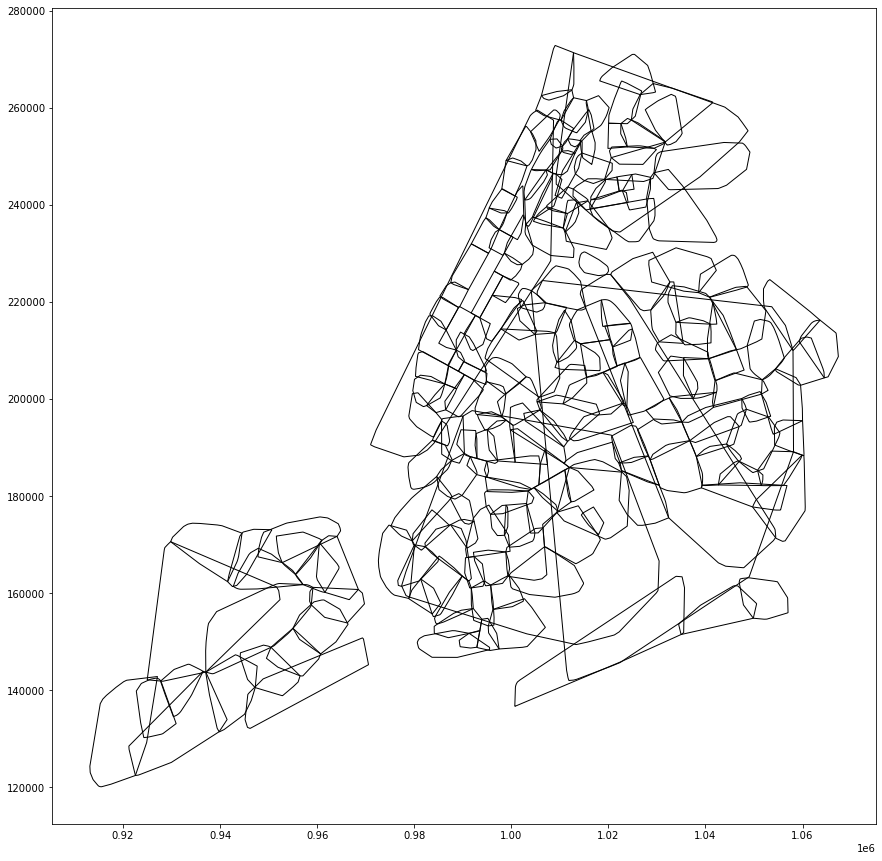

In [219]:
fig, ax = plt.subplots(figsize=(20,15)) # creating a figure

nta_shape['geometry'].convex_hull.plot(ax=ax, 
                                       color='none', 
                                       edgecolor='black')

In [220]:
fig, ax = plt.subplots(figsize=(20,15)) # creating a figure

nta_shape['geometry'].envelope.plot(ax=ax, 
                                    color='none', 
                                    edgecolor='black')

<AxesSubplot:>

<AxesSubplot:>

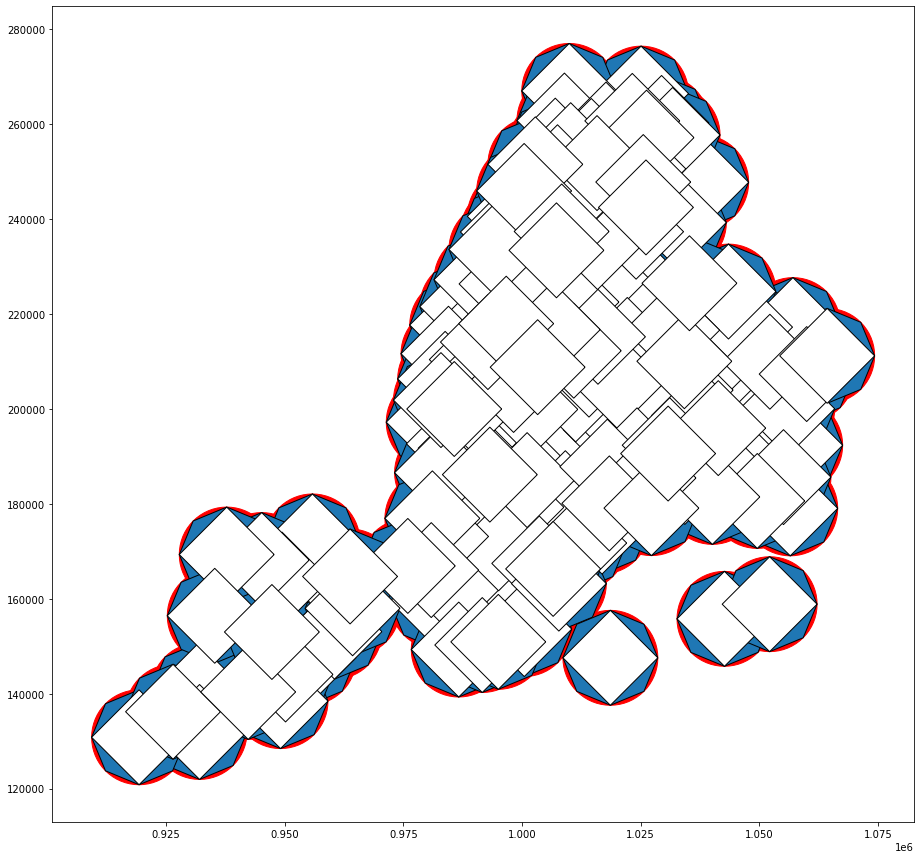

In [221]:
fig, ax = plt.subplots(figsize=(20,15)) # creating a figure

nta_shape.centroid.buffer(10000).plot(ax=ax, 
                                      color='red', 
                                      edgecolor='red')

nta_shape.centroid.buffer(10000).simplify(1000).plot(ax=ax, 
                                      color=None, 
                                      edgecolor='black')

nta_shape.centroid.buffer(10000).simplify(10000).plot(ax=ax, 
                                      color='white', 
                                      edgecolor='black')

# Making Maps

GeoPandas has three basic classes of geometric objects (which are actually shapely objects):

- Points / Multi-Points

- Lines / Multi-Lines

- Polygons / Multi-Polygons

## Points

In [222]:
zipfile = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(zipfile)

school_points.head()

ATS_CODE BORO  BORONUM LOC_CODE  \
0  b'15K001 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K001   
1  b'17K002 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K002   
2  b'21K095 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K095   
3  b'21K096 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K096   
4  b'21K097 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K097   

               SCHOOLNAME                         SCH_TYPE  MANAGED_BY  \
0     P.S. 001 THE BERGEN                       Elementary           1   
1                M.S. 002  Junior High-Intermediate-Middle           1   
2  P.S. 095 THE GRAVESEND                              K-8           1   
3       I.S. 096 SETH LOW  Junior High-Intermediate-Middle           1   
4    P.S. 97 THE HIGHLAWN                       Elementary           1   

   GEO_DISTRI  ADMIN_DIST                 ADDRESS STATE_CODE    ZIP  \
0          15          15           309 47 STREET         NY  11220   
1          17          17     655 PARKSIDE AVENUE         NY  11226   
2          21          21  345 VAN SICKLEN STREET         NY  11223   
3          21          21             99 AVENUE P         NY  11204   
4          21          21   1855 STILLWELL AVENUE         NY  11223   

                PRINCIPAL       PRIN_PH           FAX  \
0        Jennifer Eusanio  718-567-7661  718-567-9771   
1        ADRIENNE SPENCER  718-462-6992  718-284-7717   
2           Janet Ndzibah  718-449-5050  718-449-3047   
3  Denise Sandra Levinsky  718-236-1344  718-236-2397   
4       KRISTINE MUSTILLO  718-372-7393  718-372-3842   

                             GRADES      City                       geometry  
0           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (980985.054 175780.759)  
1                       06,07,08,SE  BROOKLYN  POINT (997785.136 178431.911)  
2  PK,0K,01,02,03,04,05,06,07,08,SE  BROOKLYN  POINT (991224.983 156323.361)  
3                       06,07,08,SE  BROOKLYN  POINT (988439.681 160709.993)  
4           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (988205.073 158329.591)

<AxesSubplot:>

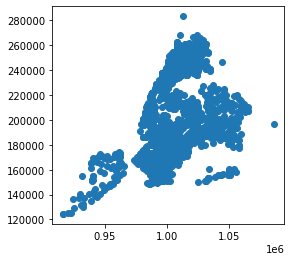

In [223]:
school_points.plot()

(907923.4919270311, 1094296.2593642443, 116536.22718050248, 291270.9651156455)

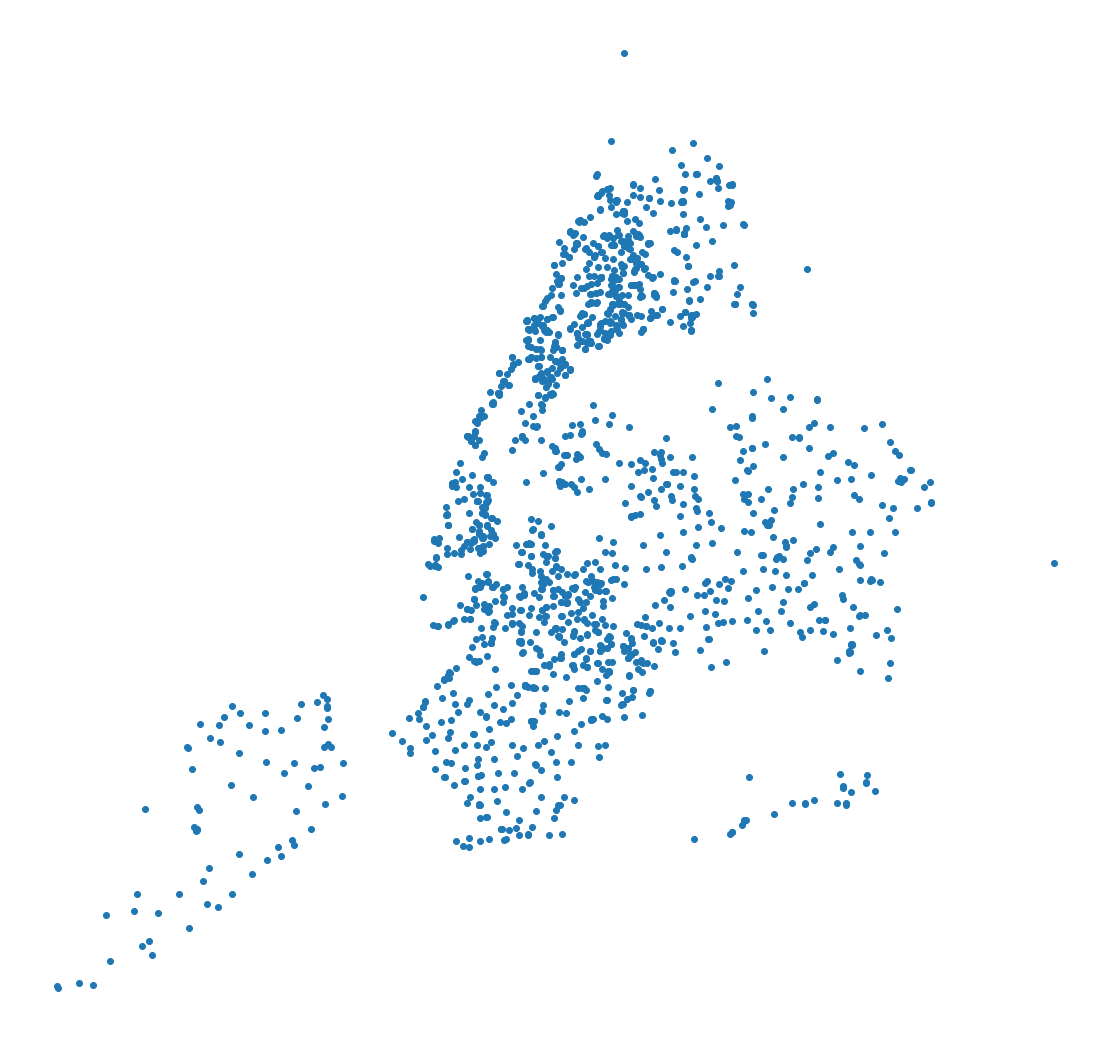

In [224]:
fig, ax = plt.subplots(figsize=(20,15)) # creating a figure

school_points = school_points.to_crs(epsg=2263) # converting to more accurate coordinate referance system
school_points.plot(ax=ax, 
                   color='#1f77b4') # plotting geodataframe as color blue
plt.tight_layout() # formatting a tight layout for our plot
plt.axis('off') # turning off figure axis

## Lines

In [225]:
url = 'https://data.cityofnewyork.us/api/geospatial/exjm-f27b?method=export&format=GeoJSON'
streets = gpd.read_file(url)

streets.head()

rw_type l_low_hn pre_direct st_width  r_zip r_low_hn bike_lane post_type  \
0       6     None       None        0  10458     None      None       TRL   
1       1  215-001       None       35  11360  215-000      None       AVE   
2       1     5631       None       42  10471     5602      None       AVE   
3       1      317       None       50  11217      316         2        ST   
4       1  120-011       None       40  11415        0      None      BLVD   

   r_blkfc_id bike_trafd  ... snow_pri borocode trafdir pre_modifi  \
0           0       None  ...     None        2      NV       None   
1   112262650       None  ...        S        4      TW       None   
2  1522601877       None  ...        H        2      TW       None   
3  1922612977         TW  ...        C        3      TW       None   
4    92269521       None  ...        C        4      TF       None   

                      st_label physicalid                  st_name  \
0  MITSUBISHI WILD WETLAND TRL     164809  MITSUBISHI WILD WETLAND   
1                       28 AVE       6110                       28   
2                ARLINGTON AVE      61140                ARLINGTON   
3              SCHERMERHORN ST     145494             SCHERMERHORN   
4                  QUEENS BLVD      12438                   QUEENS   

               created l_high_hn  \
0  2014-08-19T00:00:00      None   
1  2007-11-29T00:00:00   215-027   
2  2007-11-29T00:00:00      5699   
3  2007-11-29T00:00:00       399   
4  2007-11-29T00:00:00   120-011   

                                            geometry  
0  MULTILINESTRING ((-73.87862 40.86192, -73.8786...  
1  MULTILINESTRING ((-73.77290 40.77780, -73.7720...  
2  MULTILINESTRING ((-73.90711 40.90519, -73.9067...  
3  MULTILINESTRING ((-73.98182 40.68733, -73.9805...  
4  MULTILINESTRING ((-73.83002 40.71401, -73.8298...  

[5 rows x 32 columns]

In [226]:
streets.plot()

<AxesSubplot:>

(905650.6073791477, 1075080.906658936, 113170.08619376768, 280284.1900511943)

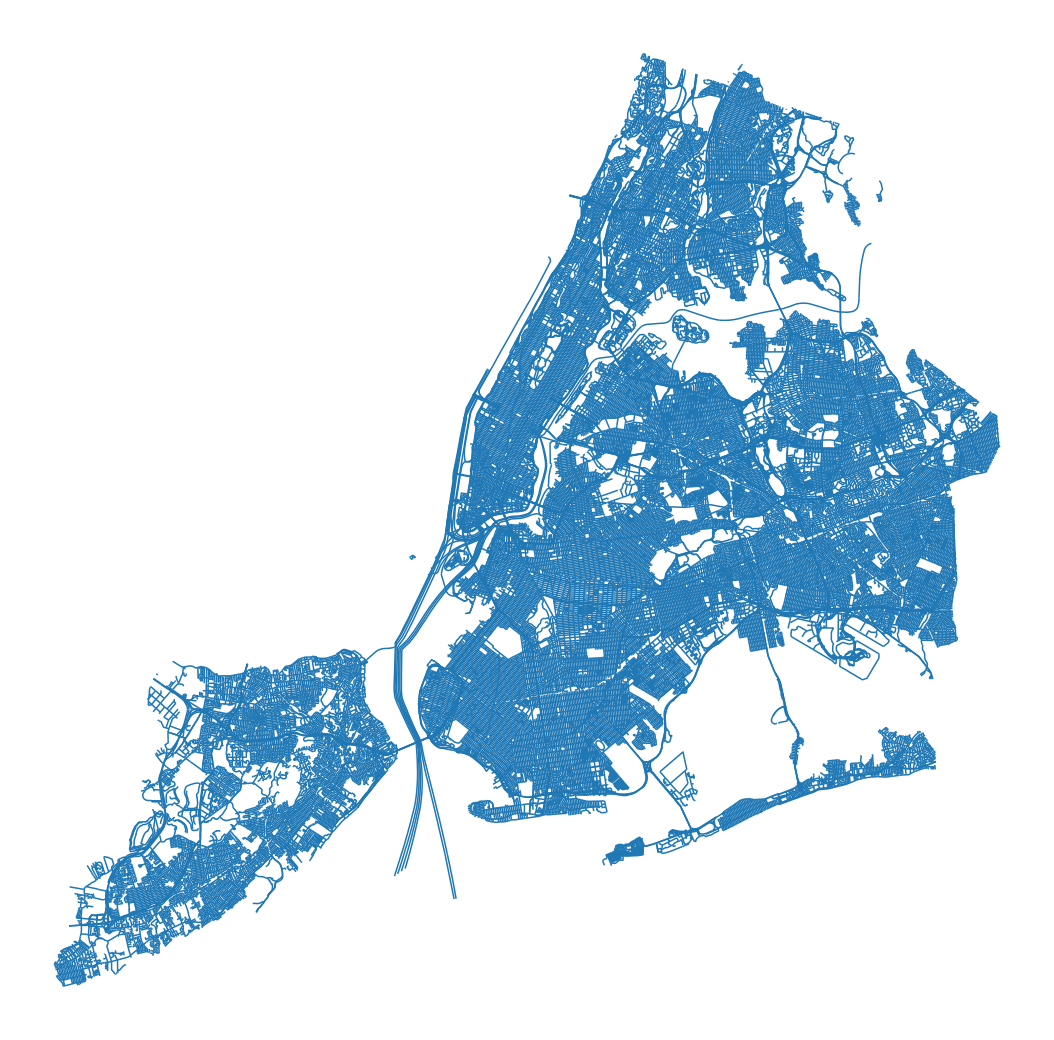

In [227]:
fig, ax = plt.subplots(figsize=(20,15)) # creating a figure

streets = streets.to_crs(epsg=2263) # converting to more accurate coordinate referance system
streets.plot(ax=ax, color='#1f77b4') # plotting geodataframe as color blue
plt.tight_layout() # formatting a tight layout for our plot
plt.axis('off') # turning off figure axis

## Polygons

In [228]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...

<AxesSubplot:>

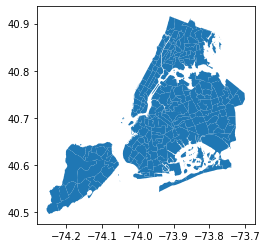

In [229]:
nta_shape.plot()

(905464.73902893, 1075092.8785858138, 112485.76062387296, 280480.4146435305)

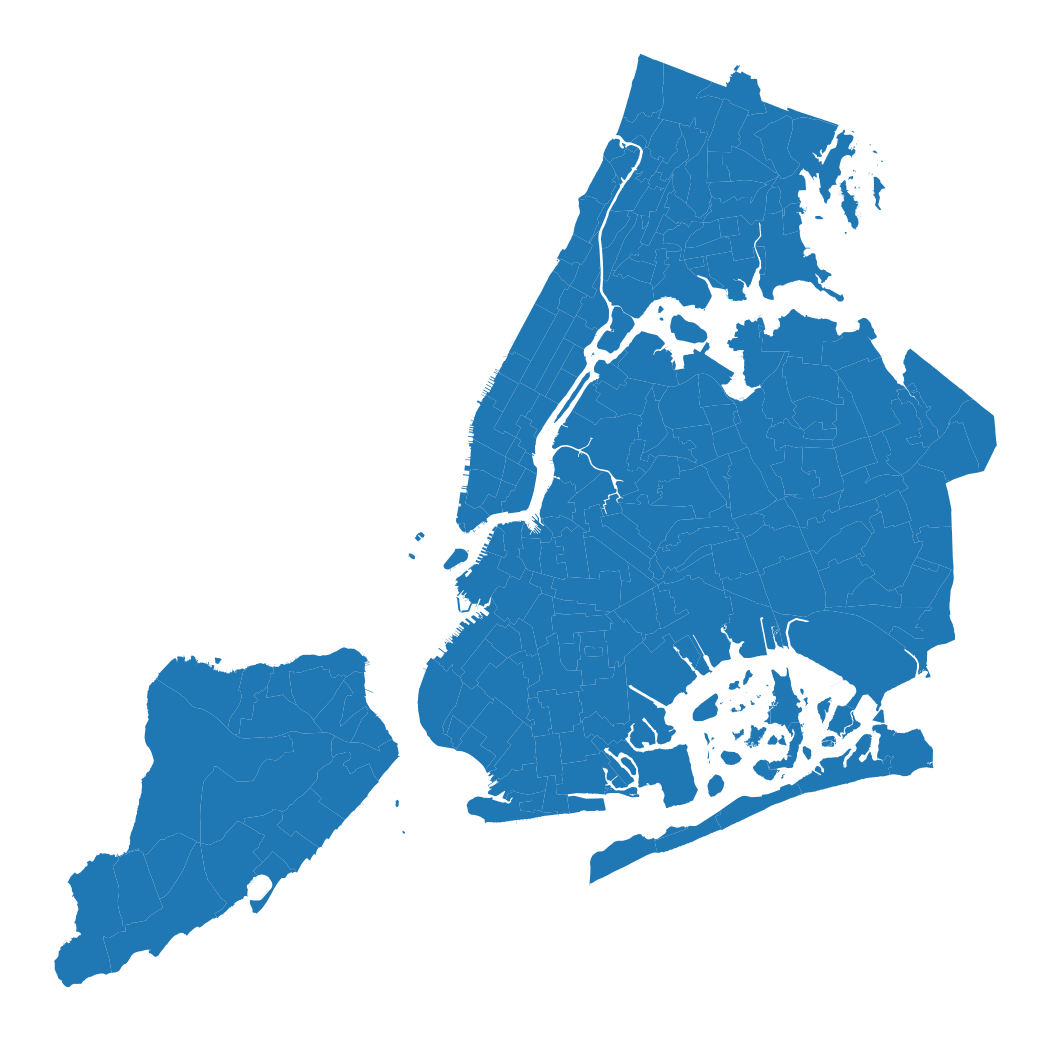

In [230]:
fig, ax = plt.subplots(figsize=(20,15)) # creating a figure

nta_shape = nta_shape.to_crs(epsg=2263) # converting to more accurate coordinate referance system
nta_shape.plot(ax=ax, 
               color='#1f77b4') # plotting geodataframe as color blue
plt.tight_layout() # formatting a tight layout for our plot
plt.axis('off') # turning off figure axis

## Maps with layers

(904542.6259624638, 1094457.2529816048, 111961.55147280241, 291488.8068160122)

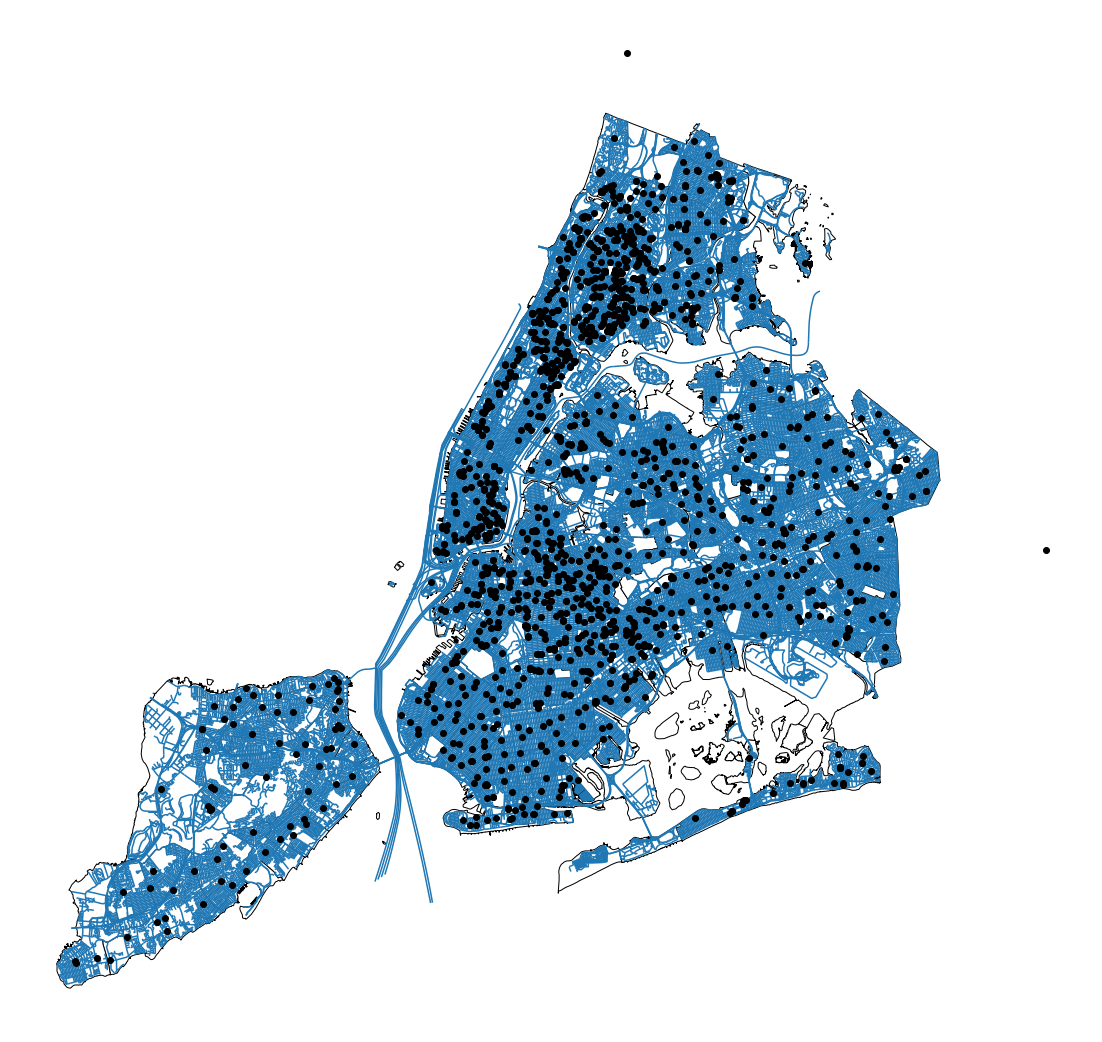

In [231]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_aspect('equal')

nta_shape.plot(ax=ax, 
               color='white', 
               edgecolor='black', 
               zorder=1)
streets.plot(ax=ax, 
             zorder=2)
school_points.plot(ax=ax, 
                   color='black', 
                   zorder=3)

plt.tight_layout()
plt.axis('off')

## Adding background map to plots

(904542.6259624638, 1094457.2529816048, 111961.55147280241, 291488.8068160122)

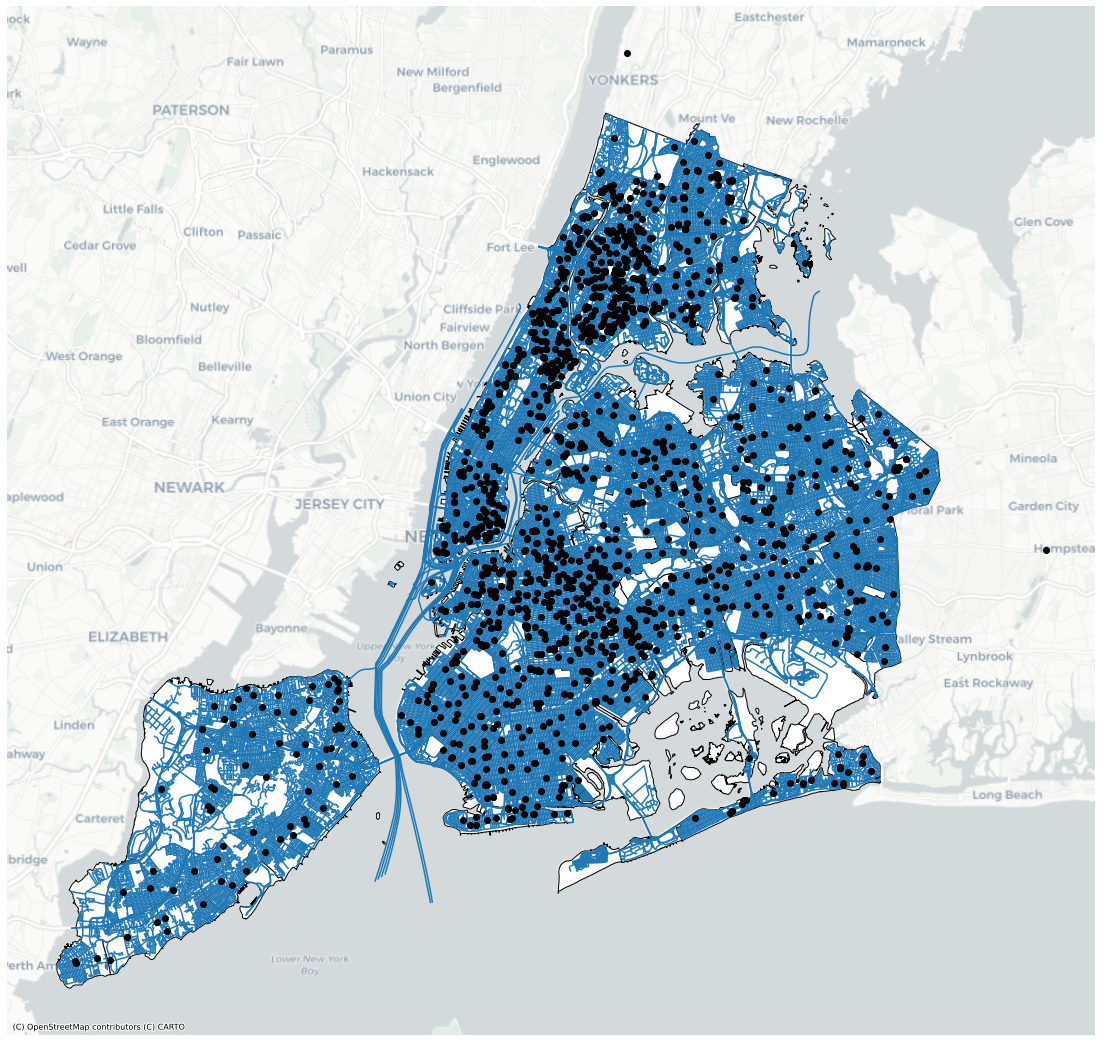

In [232]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_aspect('equal')

nta_shape.plot(ax=ax, 
               color='white', 
               edgecolor='black', 
               zorder=1)
streets.plot(ax=ax, 
             zorder=2)
school_points.plot(ax=ax, 
                   color='black', 
                   zorder=3)

ctx.add_basemap(ax, 
                crs=2263, 
                source=ctx.providers.CartoDB.Positron)

plt.tight_layout()
plt.axis('off')

## Clip Data

(904542.6259624638, 1094457.2529816048, 111961.55147280241, 291488.8068160122)

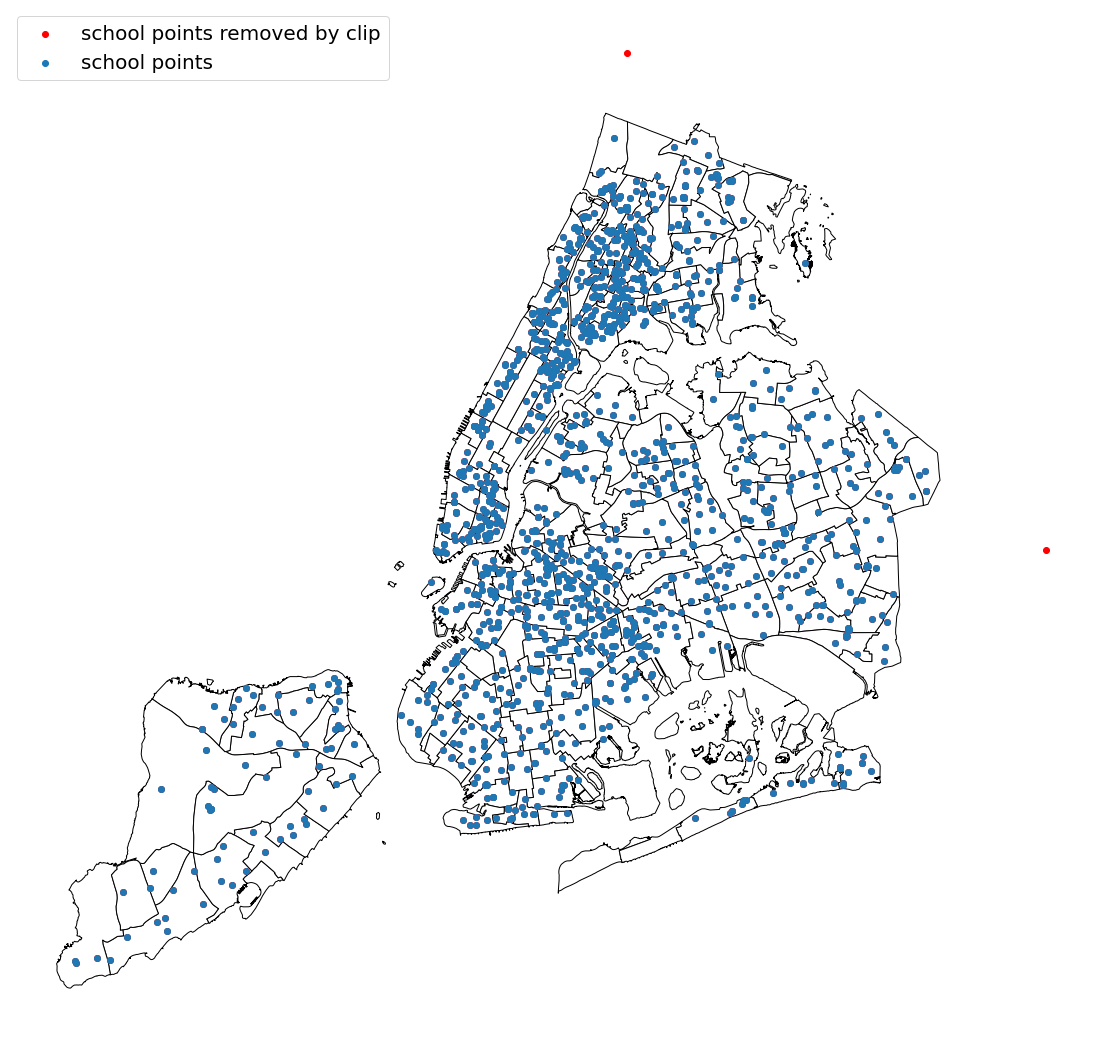

In [233]:
school_points_clipped = gpd.clip(school_points, nta_shape)

fig, ax = plt.subplots(figsize=(20,15))
ax.set_aspect('equal')

nta_shape.plot(ax=ax, 
               color="white", 
               edgecolor='black', 
               zorder=1)                                
school_points.plot(ax=ax, 
                   color='red', 
                   zorder=2)
school_points_clipped.plot(ax=ax, 
                           color='#1f77b4', 
                           zorder=3)

plt.legend(['school points removed by clip', 'school points'], 
           loc='upper left', 
           fontsize=20)
plt.tight_layout()
plt.axis('off')

## Choropleth Maps

In [234]:
url = 'https://data.cityofnewyork.us/api/views/swpk-hqdp/rows.csv?accessType=DOWNLOAD'
nyc_pop = pd.read_csv(url)

nyc_pop.head()

Borough  Year  FIPS County Code NTA Code                         NTA Name  \
0   Bronx  2000                 5     BX01               Claremont-Bathgate   
1   Bronx  2000                 5     BX03  Eastchester-Edenwald-Baychester   
2   Bronx  2000                 5     BX05       Bedford Park-Fordham North   
3   Bronx  2000                 5     BX06                          Belmont   
4   Bronx  2000                 5     BX07                        Bronxdale   

   Population  
0       28149  
1       35422  
2       55329  
3       25967  
4       34309

In [235]:
nyc_pop['Year'].unique()

array([2000, 2010])

In [236]:
nyc_pop = nyc_pop.loc[nyc_pop['Year'] == 2010]

In [237]:
nyc_pop['Year'].unique()

array([2010])

In [238]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...

In [239]:
nta_pop = nta_shape.merge(nyc_pop, 
                          left_on='ntacode', 
                          right_on='NTA Code', 
                          how='inner')

In [240]:
nta_pop.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry   Borough  \
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  Brooklyn   
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...    Queens   
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...    Queens   
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  Brooklyn   
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...    Queens   

   Year  FIPS County Code NTA Code       NTA Name  Population  
0  2010                47     BK88   Borough Park      106357  
1  2010                81     QN51    Murray Hill       51739  
2  2010                81     QN27  East Elmhurst       23150  
3  2010                47     BK95        Erasmus       29938  
4  2010                81     QN07         Hollis       20269

In [241]:
nta_pop.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [242]:
nta_pop.to_crs(epsg=2263, inplace=True)
nta_pop.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [243]:
nta_pop['sq_ft'] = nta_pop.area
nta_pop.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry   Borough  \
0         3  MULTIPOLYGON (((990897.900 169268.121, 990588....  Brooklyn   
1         4  MULTIPOLYGON (((1038593.459 221913.355, 103936...    Queens   
2         4  MULTIPOLYGON (((1022728.275 217530.808, 102305...    Queens   
3         3  MULTIPOLYGON (((998608.334 171942.436, 998339....  Brooklyn   
4         4  MULTIPOLYGON (((1051539.660 201007.013, 105192...    Queens   

   Year  FIPS County Code NTA Code       NTA Name  Population        sq_ft  
0  2010                47     BK88   Borough Park      106357 54005019.048  
1  2010                81     QN51    Murray Hill       51739 52488277.591  
2  2010                81     QN27  East Elmhurst       23150 19726946.569  
3  2010                47     BK95        Erasmus       29938 14522603.592  
4  2010                81     QN07         Hollis       20269 22887772.809

In [244]:
nta_pop['sq_mi'] = nta_pop['sq_ft'] / 27878400

nta_pop.head()   

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry   Borough  \
0         3  MULTIPOLYGON (((990897.900 169268.121, 990588....  Brooklyn   
1         4  MULTIPOLYGON (((1038593.459 221913.355, 103936...    Queens   
2         4  MULTIPOLYGON (((1022728.275 217530.808, 102305...    Queens   
3         3  MULTIPOLYGON (((998608.334 171942.436, 998339....  Brooklyn   
4         4  MULTIPOLYGON (((1051539.660 201007.013, 105192...    Queens   

   Year  FIPS County Code NTA Code       NTA Name  Population        sq_ft  \
0  2010                47     BK88   Borough Park      106357 54005019.048   
1  2010                81     QN51    Murray Hill       51739 52488277.591   
2  2010                81     QN27  East Elmhurst       23150 19726946.569   
3  2010                47     BK95        Erasmus       29938 14522603.592   
4  2010                81     QN07         Hollis       20269 22887772.809   

   sq_mi  
0  1.937  
1  1.883  
2  0.708  
3  0.521  
4  0.821

In [245]:
nta_pop['density (pop/sq_mi)'] = nta_pop['Population'] / nta_pop['sq_mi']

In [246]:
nta_pop.sort_values(by='density (pop/sq_mi)', ascending=False).iloc[:5,-6:]

NTA Code         NTA Name  Population        sq_ft  sq_mi  \
79      MN32        Yorkville       77942 13602039.796  0.488   
90      BX40    Fordham South       28262  6308875.236  0.226   
126     MN22     East Village       44136 10894242.599  0.391   
61      MN14   Lincoln Square       61489 15805523.623  0.567   
87      MN12  Upper West Side      132378 34379942.456  1.233   

     density (pop/sq_mi)  
79            159747.971  
90            124887.450  
126           112944.158  
61            108456.700  
87            107344.183

<AxesSubplot:>

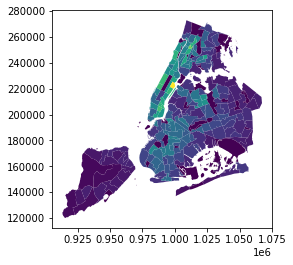

In [247]:
nta_pop.plot(column='density (pop/sq_mi)')

(905464.73902893, 1075092.8785858138, 112485.76062387296, 280480.4146435305)

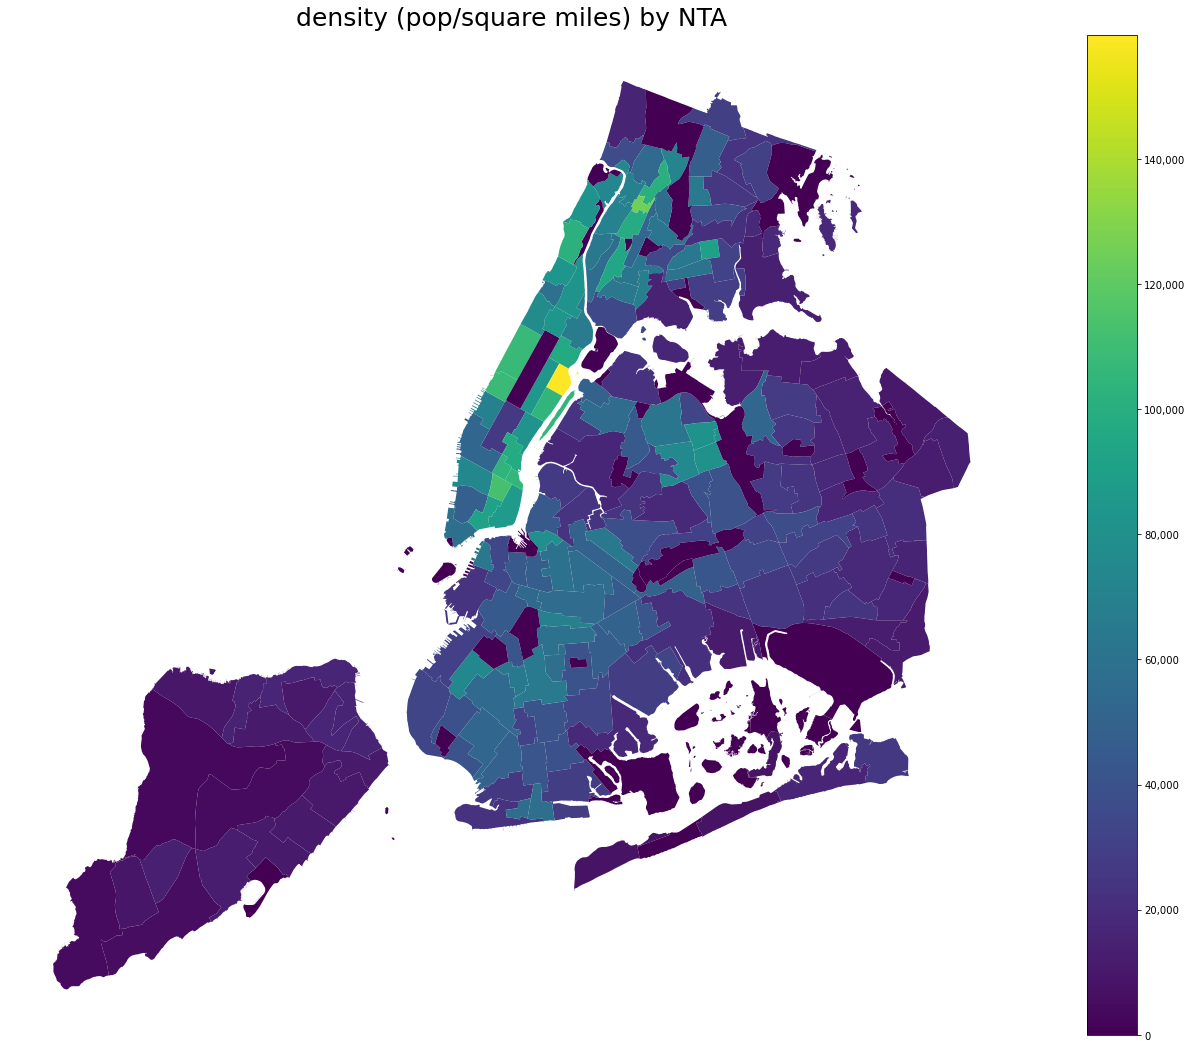

In [248]:
fig, ax = plt.subplots(figsize=(20,15))

comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))

nta_pop.plot(column='density (pop/sq_mi)', 
             ax=ax, 
             legend=True,
             legend_kwds={'format':comma_fmt})

ax.set_title('density (pop/square miles) by NTA', 
             fontsize=25, 
             pad=10)

plt.tight_layout()
plt.axis('off')

In [249]:
fig, ax = plt.subplots(figsize=(20,15))

nta_pop.plot(column='density (pop/sq_mi)', 
             ax=ax, 
             legend=True, 
             scheme='fisher_jenks',
             k = 7,
             legend_kwds={'loc': "upper left", 
                          'fmt': "{:,.0f}",
                          'fontsize': "20"})

ax.set_title('density (pop/square miles) by NTA', fontsize=25, pad=10)

plt.tight_layout()
plt.axis('off')

(905464.73902893, 1075092.8785858138, 112485.76062387296, 280480.4146435305)

# Joining Data

## Attribute Join

In [250]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...

In [251]:
url = 'https://data.cityofnewyork.us/api/views/swpk-hqdp/rows.csv?accessType=DOWNLOAD'
nyc_pop = pd.read_csv(url)

nyc_pop.head()

Borough  Year  FIPS County Code NTA Code                         NTA Name  \
0   Bronx  2000                 5     BX01               Claremont-Bathgate   
1   Bronx  2000                 5     BX03  Eastchester-Edenwald-Baychester   
2   Bronx  2000                 5     BX05       Bedford Park-Fordham North   
3   Bronx  2000                 5     BX06                          Belmont   
4   Bronx  2000                 5     BX07                        Bronxdale   

   Population  
0       28149  
1       35422  
2       55329  
3       25967  
4       34309

In [252]:
print(nyc_pop['Year'].unique())

nyc_pop = nyc_pop.loc[nyc_pop['Year'] == 2010]

print(nyc_pop['Year'].unique())

[2000 2010]
[2010]


In [253]:
print(nta_shape['ntaname'].dtype)
print(nyc_pop['NTA Name'].dtype)

object
object


In [254]:
nta_shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ntacode      195 non-null    object  
 1   shape_area   195 non-null    object  
 2   county_fips  195 non-null    object  
 3   ntaname      195 non-null    object  
 4   shape_leng   195 non-null    object  
 5   boro_name    195 non-null    object  
 6   boro_code    195 non-null    object  
 7   geometry     195 non-null    geometry
dtypes: geometry(1), object(7)
memory usage: 12.3+ KB


In [255]:
nta_with_pop = nta_shape.merge(nyc_pop, 
                               left_on='ntacode', 
                               right_on='NTA Code')

In [256]:
nta_with_pop.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry   Borough  \
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  Brooklyn   
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...    Queens   
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...    Queens   
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  Brooklyn   
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...    Queens   

   Year  FIPS County Code NTA Code       NTA Name  Population  
0  2010                47     BK88   Borough Park      106357  
1  2010                81     QN51    Murray Hill       51739  
2  2010                81     QN27  East Elmhurst       23150  
3  2010                47     BK95        Erasmus       29938  
4  2010                81     QN07         Hollis       20269

In [257]:
nta_with_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ntacode           195 non-null    object  
 1   shape_area        195 non-null    object  
 2   county_fips       195 non-null    object  
 3   ntaname           195 non-null    object  
 4   shape_leng        195 non-null    object  
 5   boro_name         195 non-null    object  
 6   boro_code         195 non-null    object  
 7   geometry          195 non-null    geometry
 8   Borough           195 non-null    object  
 9   Year              195 non-null    int64   
 10  FIPS County Code  195 non-null    int64   
 11  NTA Code          195 non-null    object  
 12  NTA Name          195 non-null    object  
 13  Population        195 non-null    int64   
dtypes: geometry(1), int64(3), object(10)
memory usage: 22.9+ KB


## Spatial Join

In [258]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...

In [259]:
zipfile = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(zipfile)

school_points.head()

ATS_CODE BORO  BORONUM LOC_CODE  \
0  b'15K001 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K001   
1  b'17K002 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K002   
2  b'21K095 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K095   
3  b'21K096 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K096   
4  b'21K097 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K097   

               SCHOOLNAME                         SCH_TYPE  MANAGED_BY  \
0     P.S. 001 THE BERGEN                       Elementary           1   
1                M.S. 002  Junior High-Intermediate-Middle           1   
2  P.S. 095 THE GRAVESEND                              K-8           1   
3       I.S. 096 SETH LOW  Junior High-Intermediate-Middle           1   
4    P.S. 97 THE HIGHLAWN                       Elementary           1   

   GEO_DISTRI  ADMIN_DIST                 ADDRESS STATE_CODE    ZIP  \
0          15          15           309 47 STREET         NY  11220   
1          17          17     655 PARKSIDE AVENUE         NY  11226   
2          21          21  345 VAN SICKLEN STREET         NY  11223   
3          21          21             99 AVENUE P         NY  11204   
4          21          21   1855 STILLWELL AVENUE         NY  11223   

                PRINCIPAL       PRIN_PH           FAX  \
0        Jennifer Eusanio  718-567-7661  718-567-9771   
1        ADRIENNE SPENCER  718-462-6992  718-284-7717   
2           Janet Ndzibah  718-449-5050  718-449-3047   
3  Denise Sandra Levinsky  718-236-1344  718-236-2397   
4       KRISTINE MUSTILLO  718-372-7393  718-372-3842   

                             GRADES      City                       geometry  
0           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (980985.054 175780.759)  
1                       06,07,08,SE  BROOKLYN  POINT (997785.136 178431.911)  
2  PK,0K,01,02,03,04,05,06,07,08,SE  BROOKLYN  POINT (991224.983 156323.361)  
3                       06,07,08,SE  BROOKLYN  POINT (988439.681 160709.993)  
4           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (988205.073 158329.591)

In [260]:
nta_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [261]:
school_points.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [262]:
nta_shape.to_crs(epsg=2263, inplace=True)
nta_shape.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [263]:
school_points.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1709 entries, 0 to 1708
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ATS_CODE    1707 non-null   object  
 1   BORO        1693 non-null   object  
 2   BORONUM     1709 non-null   float64 
 3   LOC_CODE    1709 non-null   object  
 4   SCHOOLNAME  1709 non-null   object  
 5   SCH_TYPE    1709 non-null   object  
 6   MANAGED_BY  1709 non-null   int64   
 7   GEO_DISTRI  1709 non-null   int64   
 8   ADMIN_DIST  1709 non-null   int64   
 9   ADDRESS     1709 non-null   object  
 10  STATE_CODE  1709 non-null   object  
 11  ZIP         1709 non-null   int64   
 12  PRINCIPAL   1693 non-null   object  
 13  PRIN_PH     1694 non-null   object  
 14  FAX         1657 non-null   object  
 15  GRADES      1708 non-null   object  
 16  City        1709 non-null   object  
 17  geometry    1709 non-null   geometry
dtypes: float64(1), geometry(1), int64(4), ob

In [264]:
school_points_with_nta = gpd.sjoin(school_points, 
                                   nta_shape, 
                                   how="inner", 
                                   op='intersects')

In [265]:
school_points_with_nta.head()

ATS_CODE BORO  BORONUM LOC_CODE  \
0    b'15K001 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K001   
36   b'15K136 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K136   
65   b'15K172 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K172   
168  b'15K295 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K295   
222  b'75K371 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K371   

                               SCHOOLNAME                         SCH_TYPE  \
0                     P.S. 001 THE BERGEN                       Elementary   
36              I.S. 136 CHARLES O. DEWEY  Junior High-Intermediate-Middle   
65   P.S. 172 BEACON SCHOOL OF EXCELLENCE                       Elementary   
168                              P.S. 295                       Elementary   
222         P.S. 371 - LILLIAN L. RASHKIS                      High school   

     MANAGED_BY  GEO_DISTRI  ADMIN_DIST        ADDRESS  ...      City  \
0             1          15          15  309 47 STREET  ...  BROOKLYN   
36            1          15          15  4004 4 AVENUE  ...  BROOKLYN   
65            1          15          15   825 4 AVENUE  ...  BROOKLYN   
168           1          15          15  330 18 STREET  ...  BROOKLYN   
222           1          15          75  355 37 STREET  ...  BROOKLYN   

                          geometry index_right ntacode     shape_area  \
0    POINT (980985.054 175780.759)         121    BK32  49990015.8359   
36   POINT (982218.628 176813.496)         121    BK32  49990015.8359   
65   POINT (984158.590 178921.890)         121    BK32  49990015.8359   
168  POINT (987330.493 180120.659)         121    BK32  49990015.8359   
222  POINT (982776.837 177607.547)         121    BK32  49990015.8359   

    county_fips           ntaname     shape_leng  boro_name boro_code  
0           047  Sunset Park West  83323.5061834   Brooklyn         3  
36          047  Sunset Park West  83323.5061834   Brooklyn         3  
65          047  Sunset Park West  83323.5061834   Brooklyn         3  
168         047  Sunset Park West  83323.5061834   Brooklyn         3  
222         047  Sunset Park West  83323.5061834   Brooklyn         3  

[5 rows x 26 columns]

In [266]:
school_points_with_nta.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1707 entries, 0 to 1615
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ATS_CODE     1707 non-null   object  
 1   BORO         1691 non-null   object  
 2   BORONUM      1707 non-null   float64 
 3   LOC_CODE     1707 non-null   object  
 4   SCHOOLNAME   1707 non-null   object  
 5   SCH_TYPE     1707 non-null   object  
 6   MANAGED_BY   1707 non-null   int64   
 7   GEO_DISTRI   1707 non-null   int64   
 8   ADMIN_DIST   1707 non-null   int64   
 9   ADDRESS      1707 non-null   object  
 10  STATE_CODE   1707 non-null   object  
 11  ZIP          1707 non-null   int64   
 12  PRINCIPAL    1693 non-null   object  
 13  PRIN_PH      1693 non-null   object  
 14  FAX          1656 non-null   object  
 15  GRADES       1706 non-null   object  
 16  City         1707 non-null   object  
 17  geometry     1707 non-null   geometry
 18  index_right  1707 no

<AxesSubplot:>

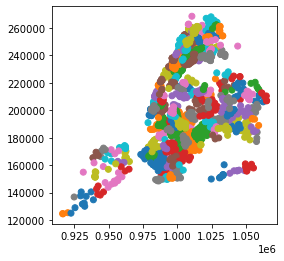

In [267]:
school_points_with_nta.plot(column='ntaname')

# Geocoding

In [268]:
boros = gpd.read_file(gpd.datasets.get_path("nybb"))
boros.head()

BoroCode       BoroName  Shape_Leng     Shape_Area  \
0         5  Staten Island  330470.010 1623819823.810   
1         4         Queens  896344.048 3045212795.200   
2         3       Brooklyn  741080.523 1937478507.610   
3         1      Manhattan  359299.096  636471539.774   
4         2          Bronx  464392.992 1186924686.490   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

<AxesSubplot:>

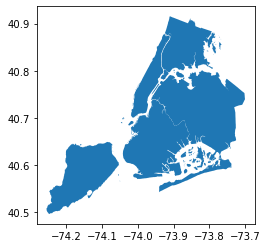

In [269]:
boros.to_crs(epsg=4326, inplace=True)

boros.plot()

In [270]:
boro_locations = gpd.tools.geocode(boros.BoroName)

boro_locations

geometry                             address
0  POINT (-74.07620 40.64350)    Staten Island, NY, United States
1  POINT (-73.81730 40.75978)        Queens County, United States
2  POINT (-73.99100 40.69253)         Brooklyn, NY, United States
3  POINT (-73.96943 40.78303)  Manhattan, New York, United States
4  POINT (-73.92027 40.82615)         Bronx County, United States

<AxesSubplot:>

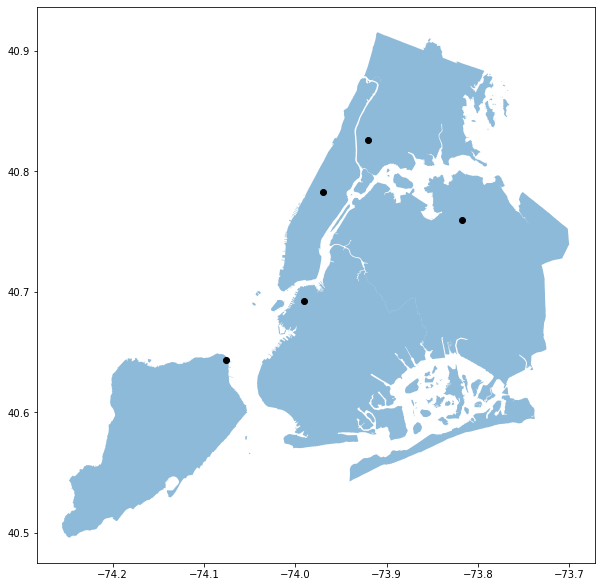

In [271]:
fig, ax = plt.subplots(figsize=(10,15))
                       
boros.plot(ax=ax, 
           alpha=.5)

boro_locations.plot(c='black', 
                    ax=ax)